# Regresión lineal y descenso de gradiente

En esta libreta vamos a explorar los aspectos más típicos de la regresión lineal, al mismo tiempo que desarrollamos los
algortimos de aprendizaje de regresión lineal por descenso de gradiente por lotes, descenso de gradiente estocástico y 
la solución por ecuación normal. 

Vamos a utilizar bases de datos simples y públicas que ilustren su aplicación, ventajas y desventajas. Algunos de los 
problemas habrá que programarlos directamente en la libreta, pero otros habrá que modificar modulos de python 
(archivos con extensión .py) en un editor externo (el de tu preferencia).

Empezamos por el principio, inicializando las variables del entorno.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Un ejemplo en una sola dimensión

Una función muy importante para poder realizar aprendizaje máquina es la capacidad de poder manejar, cargar y gurdar datos. en esta libreta vamos a empezar con lo más básico: leer datos desde un archivo texto (o un archivo.cvs). Más adelante revisaremos como recoectar datos de internet, de archivos tipo excel o de bases de datos.

*Numpy* cuenta con varios métodos para leer y guardar datos. La más utilizada para cargar datos provenientes de un archivo de texto es `loadtxt`. Para obtener la documentación de la función, simplemente ejecuta la celda siguiente: 

In [3]:
np.loadtxt?

Es importante ver que esta función directamente carga los datos existentes en el archivo en un `ndarray`. ¿Y si tenemos uno o varios `ndarrays` con las cosas que hemos desarrollado y los queremos guardar en disco (por ejemplo el vector $\omega$ de parámetros)? 

Vamos a abrir y a visualizar unos datos que se encuentran en el archivo `carretas.txt` (abrelos con un editor de texto si quieres ver el archivo original). En este archivo se tiene las ganancias anuales (en dolares) de unos tacos de carreta (bueno, su equivalente gringo) respecto al tamaño de la ciudad donde se encuentra la carreta. Estos datos provienen de el curso de *Machine learning* de *coursera* de *Andrew Ng*.


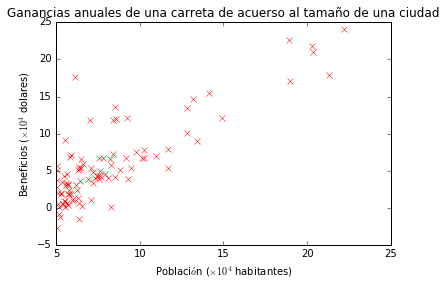

In [23]:
# Lee los datos en un nd array llamado datos
datos = np.loadtxt('carretas.txt', comments='%', delimiter=',')

# Separa los datos de entrada de los de salida.
# si decimos que x = datos[:,0], pues se toma solo una columna de datos,
# por lo que x sería un ndarray de forma (shape) (96,). Al decir x = datos[:, 0:1] 
# significa que vamos a tomar todas las columnas de 0 a una antes de 1, por lo
# que x tiene una forma (96, 1). Para nuestros intereses, es mejor manejar x xomo una matriz
# de una sola columna que como un vector de una dimensión (igual para y).
x, y = datos[:,0:1], datos[:,1:] 

# T es el número de instancias y n el de atributos
T, n = x.shape

plt.plot(x, y, 'rx')
plt.title(u'Ganancias anuales de una carreta de acuerso al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')

Listo, ya temos los datos. La hipótesis que hacemos es que el valor de salida lo podemos estimar como

$$
\hat{y}^{(i)} = h_\omega(x^{(i)}) = \omega_0 + \omega_1 x^{(i)}
$$

por lo que, para poder hacer el aprendizaje en forma eficiente, es necesario ajustar la matriz de datos de entrada (en este caso con una sola columna) agregandole una columna de puros unos. 

In [24]:
x = np.c_[np.ones_like(x), x]

Muy bien, el objetivo del algoritmo de mínimos cuadrados es el de minimizar el costo definido como
$$
J(\theta) = \frac{1}{2T} \sum_{i = 1}^T (y^{(i)} - h_\omega(x^{(i)}))^2.
$$

Por lo tanto, para saber si estamos minimizando o no, debemos ser capaces de medir la función de costo. 

**Desarrolla la función de costo tal como se pide abajo**

In [37]:
def costo(x, y, w):
    """
    Calcula el costo de acuerdo al criterio de MSE (mean square error) asumiendo un conjunto de datos
    x, con una salida y, y una hipótesis lineal parametrizada por omega
    
    @param x: Un ndarray de dimension (T, n + 1)
    @param y: Un ndarray de dimensión (T, 1)
    @param w: Un ndarray de dimensión (n + 1, 1)
    
    @return: Un número real con el costo
    """
    T, n = x.shape[0], x.shape[1] - 1
        
    # Puedes hacerlo en forma de ciclos
    J = 0
    for instancia in range(T):
       J += (1/(2*T))*np.square(y[instancia,0]-x[instancia,0]*w[0])
    return J
    
#     Puedes hacerlo directamente en forma matricial 
#     error = (1/(2*T))*(np.sum(np.square(y-x.dot(w))))
#     return error
    


y para probar si está bien el programa, si calculamos $J(\omega)$ para $\omega = (0, 0)^T$ debe de dar (para este conjunto de datos) **32.07**.

In [38]:
w = np.zeros([n + 1, 1])
print (costo(x, y, w))

[ 32.07273388]


Muy bien, ya podemos calcular el costo. Vamos entonces a utilizar la función que acabamos de hacer para ver como funciona esto del costo para diferentes valores de $\omega$ y ver esa famosa superficie convexa:

In [ ]:
# Definimos una función que depende solo de theta0 y theta1
def costo_w(w0, w1):
    return costo(x, y, np.array([[w0], [w1]]))

# Y ahora la convertimos en una función tipo numpy (aplica para cualquier entrada de ndarrays)
costo_vect = np.frompyfunc(costo_w, 2, 1)

#Ahora generamos la lista de valores para graficar
w0 = np.linspace(-10, 10, 100);
w1 = np.linspace(-1, 4, 100);

# Y los convertimos en matrices utilizando la función meshgrid
w0, w1 = np.meshgrid(w0, w1)

# Y calculamos los costos para cada par de theta0 y theta 1 con nuestra nueva funcion de costos vectorizada
J = costo_vect(w0, w1)

# Y graficamos el contorno
plt.contour(w0, w1, J, 80, linewidths=0.5, colors='k')
plt.contourf(w0, w1, J, 80, cmap=plt.cm.rainbow, vmax=J.max(), vmin=J.min())
plt.colorbar()
plt.xlabel(r"$\omega_0$")
plt.ylabel(r"$\omega_1$")
plt.title(r"Funcion de costo $J(\omega)$")
        

Ahora si, ya tenemos todo para hacer nuestra función para encontrar la $\omega$ optima (que como se puede ver en la superficie debería de estar por donde $\omega_0$ vale entre 0 y -5 y $\omega_1$ entre 1 y 2). 

**Desarrolla la función con descenso de gradiente.**

In [ ]:
def descenso_gradiente_lotes(x, y, w_ini, alpha, num_iter):
    """
    Descenso de gradiente durante num_iter iteraciones para regresión lineal
    
    @param x: ndarray de dimension [T, n + 1] con los datos de entrada
    @param y: ndarray de dimension [T, 1] con los datos de salida
    @param w_ini: ndarray de dimension [n + 1, T] con los parametros iniciales
    @param alpha: flotante con tamaño de paso o tasa de aprendizaje.
    @param num_iter: numero de iteraciones (entero)
    
    @return: w, costo_iter donde w es un ndarray de la dimansión de w_ini con la w final, 
             mientras que costo_hist es un ndarray de dimensión [num_iter, 1] con el costo en cada iteración.
    
    """
    w = w_ini.copy()
    costo_iter = np.zeros(num_iter)
    
    T, n = x.shape[0], x.shape[1] - 1
    
    for iter in xrange(num_iter):
        
        # Aqui igualmente se puede hacer por cada dato o en forma matricial
        # por favor intenta hacerlo en forma matricial, qu es la forma 
        # eficiente de hacerlo
        
        # w += --aqui hay que poner código--
        
        costo_iter[iter] = costo(x, y, w)
    return w, costo_iter
     

Listo, ya lo tenemos, ahora podemos utilizar la ecuación normal para solucionar el problema de forma analítica (revisen por favor sus apuntes).

**Desarrolla la función para obtener el valor de theta a partir de la ecuación normal.**

In [ ]:
def ecuacion_normal(x, y):
    """
    Encuentra la solución de mínimos cuadrados a partir de la ecuación normal

    @param x: ndarray de dimension [T, n + 1] con los datos de entrada
    @param y: ndarray de dimension [T, 1] con los datos de salida
    
    @return w: ndarray de dimension [n + 1, T] con los parametros encontrados
    """
    
    # Esta función en realidad es una sola linea de código
    # return --inserta aqui tu código--
    

Y para verificar las soluciones de las funciones anteriores, pues esperariamos que ante el mismo problema tuvieramos soluciones similares

In [ ]:
w_ini = np.zeros((n + 1, 1))
iteraciones = 1500
alpha = 0.01

w_dg, costos = descenso_gradiente_lotes(x, y, w_ini, alpha, iteraciones)
theta_n = ecuacion_normal(x, y)

print "w con descenso de gradiente: "
print w_dg

print u"w con ecuación normal: "
print w_n

plt.plot(costos, 'b')
plt.title(u'Costo por iteración')
plt.xlabel(u'iteración')
plt.ylabel('costo')

Si las soluciones no te parecen similares, pues vuelve a ejecutar la celda anterios pero con 10 veces más iteraciones. Ahora vamos a estimar los valores para una ciudad con 40000 habitantes (algo como Magdalena de Kino me imagino) y otra de 240000 (como Obregon me imagino).

**Completa los pasos para realizar la estimación.**

In [ ]:
x_estimar = np.array([4,24]).reshape(-1,1)

#
# Agrega el codigo necesario
#

print "Los valores estimados con w_dg son: "
print y_estimado

Si los valores que obtuviste son cercanos a 1 (10000 dolares) y 24.3 (243000 dolares) entonces estamos en los valores esperados. Ahora vamos a usar estos valores para graficar los datos reales y la estimación realizada:

In [ ]:
plt.plot(x[:,1], y, 'xr')
plt.plot(x_estimar[:,0], y_estimado, '-b')
plt.title(u'Ganancias anuales de una carreta de acuerso al tamaño de una ciudad')
plt.xlabel(r"Poblaci$\'o$n ($\times 10^4$ habitantes)")
plt.ylabel(r'Beneficios ($\times 10^4$ dolares)')

**Felicidades** Acabas de terminar el primer algoritmo de aprendizaje (y el más usado en el mundo).

# 2. Un ejemplo en multiples dimensiones

Como los algortimos que se realizaron ya funcionan muy bien para muchas dimensiones, pues no se espera tener mucho problema para utilizarlos. Así que ahora vamos a cargar los datos y vamos a graficar la salida respecto a cada una de las dos variables

In [ ]:
datos = np.loadtxt('casas_portland.txt', comments='%', delimiter=',')
x, y = datos[:, :-1], datos[:,-1:] 

# T es el número de instancias y n el de atributos
T, n = x.shape

plt.plot(x[:,0], y, 'rx')
plt.title(u'Costo de una casa en relación a su tamaño')
plt.xlabel(u"tamaño (pies cuadrados)")
plt.ylabel('costo ')

plt.figure()
plt.plot(x[:,1], y, 'rx')
plt.title(u'Costo de una casa en relación al número de cuartos')
plt.xlabel("cuartos")



Antes de realizar el aprendizaje podemos ver que mientras una de las variables se mide en miles de pies cuadrados, la otra variable tiene valores de 1 a 4. Esto es un problema para el algoritmo del descenso de gradiente, por lo que es necesario normalizar los datos (solo para este algoritmo) y que funcione de manera correcta. 

Para normalizar requerimos de dos pasos, por un lado, obtener los valores de medias y desviaciones estandares por atributo, y en segundo lugar, realizar la normalización. Los valores de medias y desviaciones estandares hay que guardarlos, ya que serán necesarios para poder normalizar los datos que se quiera estimar.

**Escribe la función que devuelve los valores de medias t desviaciones estandares.**

In [ ]:
def obtiene_medias_desviaciones(x):
    """
    Obtiene las medias y las desviaciones estandar atributo a atributo.
    
    @param x: un ndarray de dimensión (T, n) donde T es el númro de elementos y n el número de atributos
    
    @return: medias, desviaciones donde ambos son ndarrays de dimensiones (n,) con las medias y las desviaciones 
             estandar respectivamente.
    
    """
    # Escribe aqui el código
    #
    #
    #    
    return medias, desviaciones

def normaliza(x, medias, desviaciones):
    """
    Normaliza los datos x

    @param x: un ndarray de dimensión (T, n) donde T es el númro de elementos y n el número de atributos
    @param medias: ndarray de dimensiones (n,) con las medias con las que se normalizará
    @param desviaciones: ndarray de dimensiones (n,) con las desviaciones con las que se normalizará
    
    @return: x_norm un ndarray de las mismas dimensiones de x pero normalizado
    
    """
    return (x - medias) / desviaciones
        

# Y ahora vamos a hacer algo muy simple para probar, que pueden corroborar con el uso de una calculadora común.
x_prueba = np.array([[1, 300],
                    [3, 100],
                    [2, 400],
                    [4, 200]])
m, d = obtiene_medias_desviaciones(x_prueba)

print "Los datos son: "
print x_prueba
print "Las medias son: "
print m
print "Las desviaciones son: "
print d
print "Los datos normalizados son: "
print normaliza(x_prueba, m, d)


Listo, entonces ya podemos hacer descenso de gradiente, o casi. El problema es que no sabemos cual sería el mejor valor para $\omega$. Escoge el valor de $\omega$ realizando una gráfica de 50 iteraciones solamente para valores desde 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, ... y decide cual de los valores es el que más te conviene.

**Selecciona un valor, especifica aquí cual es, y justifica porque lo seleccionaste.**

In [ ]:
medias, desviaciones = obtiene_medias_desviaciones(x)
x_norm = np.c_[np.ones((T, 1)), normaliza(x, medias, desviaciones)]

w_ini = np.zeros((n + 1, 1))
num_iters = 50

alpha = 0.0001  # Aqui es donde hay que hacer las pruebas

w, costos_iters = descenso_gradiente_lotes(x_norm, y, w_ini, alpha, num_iters)
print w

plt.plot(costos_iters, '-b')
plt.title(r"La curva de aprendizaje para $\alpha =$ " + str(alpha))
plt.xlabel('iteraciones')
plt.ylabel('costo')

**Utilizando todo el número de iteraciones necesarias, encuentra el valor de $\omega$ utilizando el descenso de gradiente.**

In [ ]:
# Aqui ya no pongo código, esto debe ser relativamente simple

Y ahora para comparar, vamos a realizar el aprendizaje con la ecuacion normal.

In [ ]:
w_n = ecuacion_normal(np.c_[np.ones((T, 1)), x], y)
print w_n

**Obten el valor de una casa de 1650 pies cuadrados y 3 recamaras con las thetas obtenidas con ambos algoritmos y verifica que es el mismo resultado**

In [ ]:
# Escribe aquí el código

